# import all packages

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [53]:
# read data
data = pd.read_csv('titanic.csv', sep=';')
display(data.shape)
display(data.head())
display(data.info())
display(data.describe())
display(data.nunique())

(132, 13)

,PassengerId,Survived,Pclass,Name,Sex,FootSize,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,34.0,33.0,0,0,110152,86.5000,B77,S
1,2,0,3,"Garfirth, Mr. John",male,NaN,NaN,0,0,358585,14.5000,NaN,S
2,3,0,3,"Nirva, Mr. Iisakki Antino Aijo",male,NaN,41.0,0,0,SOTON/O2 3101272,7125.0000,NaN,S
3,4,1,3,"Barah, Mr. Hanna Assi",male,NaN,20.0,0,0,2663,7.2292,NaN,C
4,5,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,NaN,36.0,1,2,113760,120.0000,B96 B98,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  132 non-null    int64  
 1   Survived     132 non-null    int64  
 2   Pclass       132 non-null    int64  
 3   Name         132 non-null    object 
 4   Sex          132 non-null    object 
 5   FootSize     6 non-null      float64
 6   Age          108 non-null    float64
 7   SibSp        132 non-null    int64  
 8   Parch        132 non-null    int64  
 9   Ticket       132 non-null    object 
 10  Fare         132 non-null    float64
 11  Cabin        29 non-null     object 
 12  Embarked     131 non-null    object 
dtypes: float64(3), int64(5), object(5)
memory usage: 13.5+ KB


None

,PassengerId,Survived,Pclass,FootSize,Age,SibSp,Parch,Fare
count,132.000000,132.000000,132.000000,6.000000,108.000000,132.000000,132.000000,132.000000
mean,66.500000,0.356061,2.363636,27.500000,28.590278,0.537879,0.416667,1856.376009
std,38.249183,0.480658,0.840508,12.308534,14.393335,1.400138,0.819995,5863.540945
min,1.000000,0.000000,1.000000,12.000000,0.420000,0.000000,0.000000,0.000000
25%,33.750000,0.000000,2.000000,18.250000,18.750000,0.000000,0.000000,8.011450
50%,66.500000,0.000000,3.000000,29.000000,28.000000,0.000000,0.000000,19.004150
75%,99.250000,1.000000,3.000000,33.750000,39.000000,1.000000,1.000000,56.621850
max,132.000000,1.000000,3.000000,45.000000,74.000000,8.000000,5.000000,31275.000000


PassengerId    132
Survived         2
Pclass           3
Name           132
Sex              2
FootSize         6
Age             54
SibSp            6
Parch            5
Ticket         123
Fare            80
Cabin           27
Embarked         3
dtype: int64

# How many is there missing values?

In [54]:
data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
FootSize       126
Age             24
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          103
Embarked         1
dtype: int64

In [55]:
data.drop(['FootSize','Cabin'], axis=1,inplace=True)
data.fillna(0,inplace=True)
data.isnull().sum(axis=0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Dealing with the strings

In [56]:
strings_cols = data.select_dtypes(['object']).columns
data[strings_cols]=data[strings_cols].astype('category').apply(lambda x:x.cat.codes)

# Dealing with the separate data into train, validation,test.

In [57]:
Ydata = data.iloc[:,1]
Xdata = data.iloc[:,2:]

rd_seed = 1234

from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest = train_test_split(Xdata,Ydata,test_size=0.25, random_state=rd_seed)

Xtrain,Xval,Ytrain,Yval = train_test_split(Xtrain,Ytrain,test_size=0.25, random_state=rd_seed)

display(Xtrain.shape)
display(Ytrain.shape)
display(Xval.shape)
display(Yval.shape)
display(Xtest.shape)
display(Ytest.shape)


(74, 9)

(74,)

(25, 9)

(25,)

(33, 9)

(33,)

# Tree Classifier

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Tree Tunning

In [60]:
from sklearn.model_selection import ParameterGrid
import sklearn.metrics as metrics
param_grid = {
    'max_depth': range(1,150),
    'criterion': ['entropy', 'gini'],
    'splitter': ['best', 'random']

}

param_comb = ParameterGrid(param_grid)

val_acc = []
train_acc = []
for params in param_comb:
    dt = DecisionTreeClassifier(max_depth=params['max_depth'], criterion=params['criterion']
    ,splitter=params['splitter'])
    dt.fit(Xtrain, Ytrain)
    train_acc.append(metrics.accuracy_score(Ytrain, dt.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(Yval, dt.predict(Xval)))

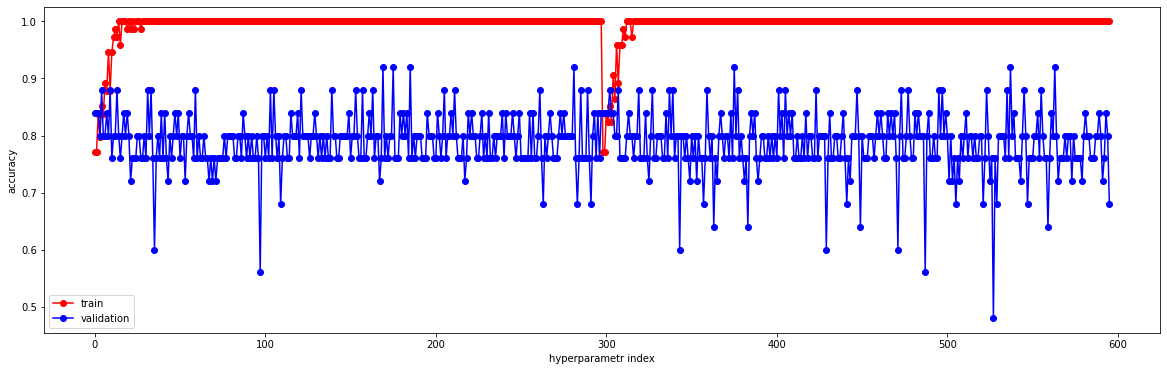

In [65]:
plt.figure(figsize=(20,6))
plt.plot(train_acc,'or-')
plt.plot(val_acc,'ob-')
plt.xlabel('hyperparametr index')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [69]:
best_params = param_comb[np.argmax(val_acc)]
best_params

{'splitter': 'random', 'max_depth': 85, 'criterion': 'entropy'}

In [71]:
dt = DecisionTreeClassifier(**best_params) # TOHOTO ŘÁDKU si všimněte: dvě hvězdišky jsou mocný nástroj
dt.fit(Xtrain, Ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(Ytrain, dt.predict(Xtrain))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(Yval, dt.predict(Xval))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(Ytest, dt.predict(Xtest))))

accuracy score (train): 1.000000
accuracy score (validation): 0.760000
accuracy score (test): 0.757576


In [87]:
out = pd.DataFrame()
out['PassengerId'] = data['PassengerId']
out['Survived'] = dt.predict(Xdata)

In [88]:
out.to_csv('titanic_pred.csv', index=False)